# Determination of Toxic Comments 
Md Shahidullah Kawsar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

sns.set_style("whitegrid")
sns.set_context('talk')

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.models import load_model


Using TensorFlow backend.


# Loading the dataset

In [4]:
df = pd.read_csv('train.csv')

In [5]:
y = np.where(df['target'] >= 0.5, 1, 0)

# tf-idf vectorizer

In [102]:
Tfidf_Vectorizer = TfidfVectorizer()
X = Tfidf_Vectorizer.fit_transform(df["comment_text"])
X.shape, y.shape

((1804874, 318304), (1804874,))

# Logistic Regression

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
LR = LogisticRegression(C=5, random_state=42, solver='sag', max_iter=100, n_jobs=-1)
LR.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=42, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

# Cross Validation (tf-idf vectorizer & Logistic Regression)

In [60]:
cv_accuracy = cross_val_score(LR, X, y, cv=5, scoring='roc_auc')
print(cv_accuracy)
print(cv_accuracy.mean())

[0.94607755 0.94436349 0.94531875 0.94375522 0.94326619]
0.9445562409935316


In [104]:
y_pred = LR.predict(X_test)

# Confusion matrix (tf-idf & Logistic Regression)

[[491188   6646]
 [ 22012  21617]]


Text(71.46000000000004, 0.5, 'true value')

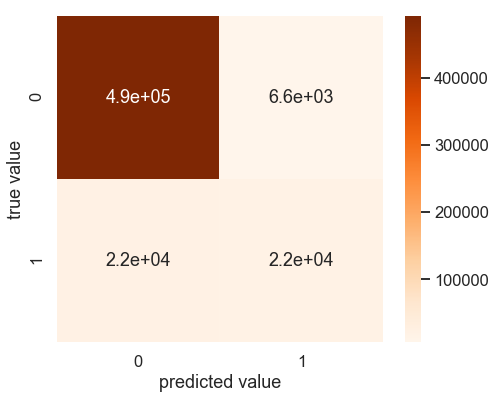

In [105]:
plt.figure(figsize=(8, 6))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

sns.heatmap(confusion_matrix, square=True, annot=True, cmap='Oranges')
plt.xlabel('predicted value')
plt.ylabel('true value')

# Classification Report (tf-idf & Logistic Regression)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    497834
           1       0.76      0.50      0.60     43629

   micro avg       0.95      0.95      0.95    541463
   macro avg       0.86      0.74      0.79    541463
weighted avg       0.94      0.95      0.94    541463



# ROC curve (tf-idf & Logistic Regression)

0.14205007272587297
0.7151385809871967


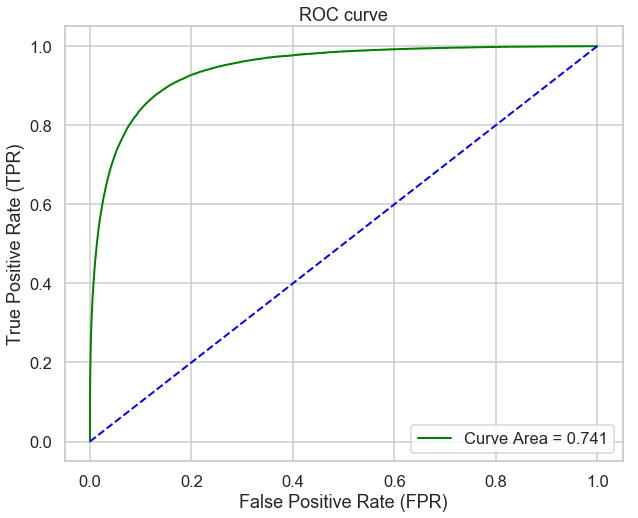

In [107]:
fpr, tpr, thr = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
print(fpr.mean())
print(tpr.mean())
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Count vectorizer

In [66]:
Count_Vectorizer = CountVectorizer()
XX = Count_Vectorizer.fit_transform(df["comment_text"])
XX.shape, y.shape

((1804874, 318304), (1804874,))

# Count vectorizer & Logistic Regression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=42)

lr = LogisticRegression(C=5, random_state=42, solver='sag', max_iter=100, n_jobs=-1)
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=42, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

# Cross Validation (Count vectorizer & Logistic Regression)

In [68]:
cv_accuracy = cross_val_score(lr, XX, y, cv=5, scoring='roc_auc')
print(cv_accuracy)
print(cv_accuracy.mean())

[0.90697166 0.90839047 0.92688822 0.91007575 0.91091192]
0.9126476047397633


In [75]:
y_pred_2 = lr.predict(X_test)

# Confusion Matrix (Count vectorizer & Logistic Regression)

[[493874   3960]
 [ 28285  15344]]


Text(81.96000000000004, 0.5, 'true value')

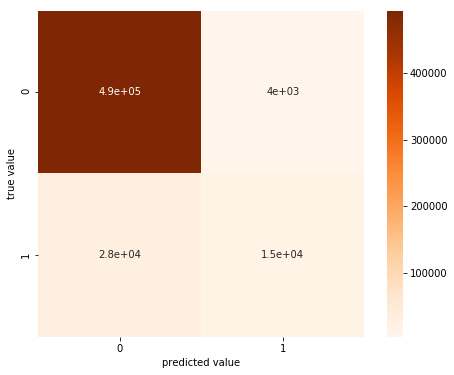

In [78]:
plt.figure(figsize=(8, 6))
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)
print(confusion_matrix_2)

sns.heatmap(confusion_matrix_2, square=True, annot=True, cmap='Oranges')
plt.xlabel('predicted value')
plt.ylabel('true value')

# Classification Report (Count vectorizer & Logistic Regression)

In [79]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    497834
           1       0.79      0.35      0.49     43629

   micro avg       0.94      0.94      0.94    541463
   macro avg       0.87      0.67      0.73    541463
weighted avg       0.93      0.94      0.93    541463



# ROC curve (Count vectorizer & Logistic Regression)

0.17804602809012599
0.6825125698694645


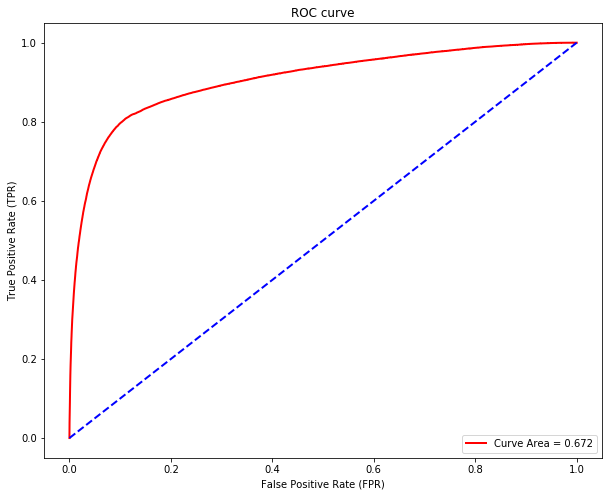

In [80]:
fpr_2, tpr_2, thr_2 = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
print(fpr_2.mean())
print(tpr_2.mean())
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr_2, tpr_2, color='red', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Hashing vectorizer

In [66]:
Hashing_Vectorizer = HashingVectorizer()
XXX = Hashing_Vectorizer.fit_transform(df["comment_text"])
XXX.shape, y.shape

((1804874, 1048576), (1804874,))

# Logistic Regression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(XXX, y, test_size=0.3, random_state=42)

Lr = LogisticRegression(C=5, random_state=42, solver='sag', max_iter=100, n_jobs=-1)
Lr.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=42, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

# Cross Validation (Hashing vectorizer & Logistic Regression)

In [68]:
cv_accuracy = cross_val_score(Lr, XXX, y, cv=5, scoring='roc_auc')
print(cv_accuracy)
print(cv_accuracy.mean())

[0.94573697 0.94389897 0.94546203 0.94408372 0.94365471]
0.9445672775252373


In [85]:
y_pred = Lr.predict(X_test)

# Confusion Matrix (Hashing vectorizer & Logistic Regression)

[[492175   5659]
 [ 23071  20558]]


Text(81.96000000000004, 0.5, 'true value')

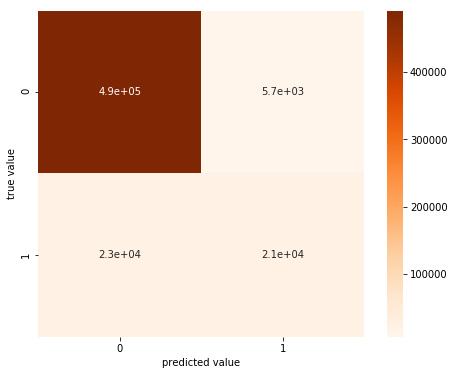

In [86]:
plt.figure(figsize=(8, 6))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

sns.heatmap(confusion_matrix, square=True, annot=True, cmap='Oranges')
plt.xlabel('predicted value')
plt.ylabel('true value')

# classification_report (Hashing vectorizer & Logistic Regression)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    497834
           1       0.78      0.47      0.59     43629

   micro avg       0.95      0.95      0.95    541463
   macro avg       0.87      0.73      0.78    541463
weighted avg       0.94      0.95      0.94    541463



# ROC curve (Hashing vectorizer & Logistic Regression)

0.14836378228189503
0.7157280871208949


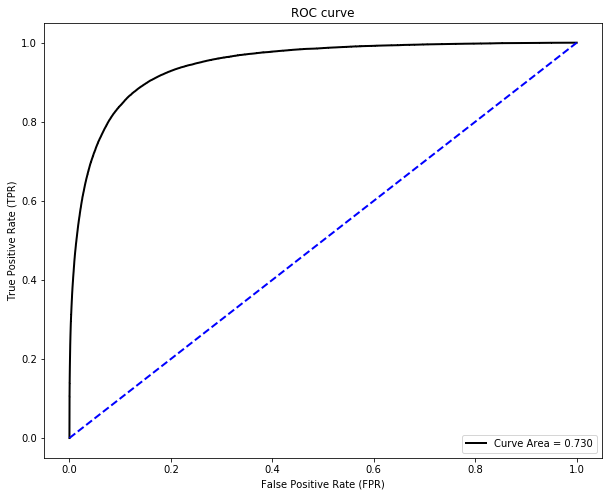

In [88]:
fpr_3, tpr_3, thr_3 = roc_curve(y_test, Lr.predict_proba(X_test)[:,1])
print(fpr_3.mean())
print(tpr_3.mean())
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr_3, tpr_3, color='black', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Comparison of ROC curves

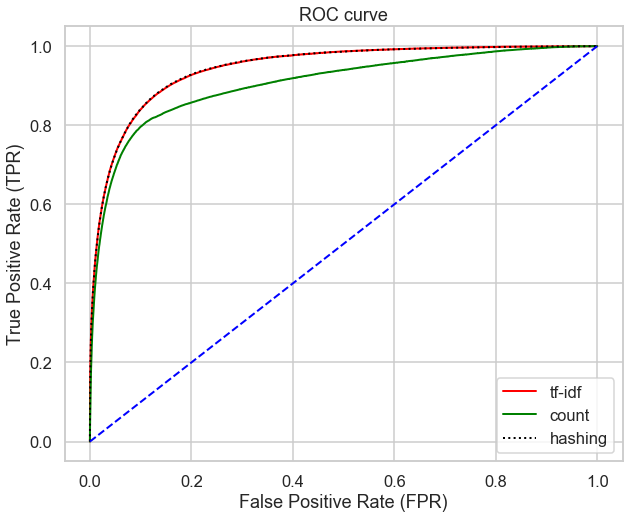

In [98]:
sns.set_style("whitegrid")
sns.set_context('talk')

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='tf-idf+LR')
plt.plot(fpr_2, tpr_2, color='green', lw=2, label='count+LR')
plt.plot(fpr_3, tpr_3, color='black', lw=2, linestyle=':', label='hashing+LR')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# LSTM

In [6]:
train = df.iloc[0:1000,:]
print(train.shape)

Vectorize = TfidfVectorizer()
train_X = Vectorize.fit_transform(train["comment_text"])

train_y = np.where(train['target'] >= 0.5, 1, 0)
print(train_X.shape) 
print(train_y.shape)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(1000, 45)
(1000, 7341)
(1000,)


((800, 7341), (200, 7341), (800,), (200,))

In [53]:
model = Sequential()
model.add(Embedding(X_train.shape[1], 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=6, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/6
800/800 [==============================] - 384s 480ms/step - loss: 0.6431 - acc: 0.9363 - val_loss: 0.5314 - val_acc: 0.9400
Epoch 2/6
800/800 [==============================] - 316s 395ms/step - loss: 0.4771 - acc: 0.9400 - val_loss: 0.2631 - val_acc: 0.9400
Epoch 3/6
800/800 [==============================] - 301s 376ms/step - loss: 0.2581 - acc: 0.9400 - val_loss: 0.2809 - val_acc: 0.9400
Epoch 4/6
800/800 [==============================] - 302s 377ms/step - loss: 0.2635 - acc: 0.9400 - val_loss: 0.2340 - val_acc: 0.9400
Epoch 5/6
800/800 [==============================] - 279s 349ms/step - loss: 0.2257 - acc: 0.9400 - val_loss: 0.2285 - val_acc: 0.9400
Epoch 6/6
800/800 [==============================] - 279s 349ms/step - loss: 0.2324 - acc: 0.9400 - val_loss: 0.2338 - val_acc: 0.9400


In [7]:
model.save('model_file_1.h5')
my_model = load_model('model_file_1.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [21]:
score, acc = my_model.evaluate(X_test, y_test, batch_size=32)
print('Test accuracy:', acc)

200/200 [==============================] - 9s 46ms/step
Test accuracy: 0.94


# LSTM Model Summary

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         939648    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,071,361
Trainable params: 1,071,361
Non-trainable params: 0
_________________________________________________________________


# Training vs Validation Accuracy & Loss (LSTM Model)

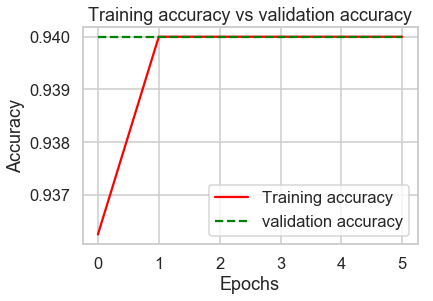

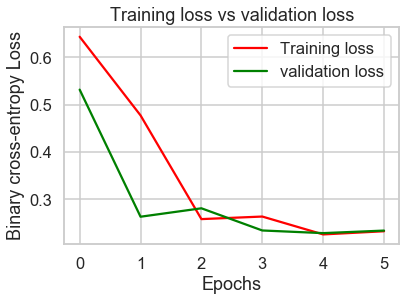

In [56]:
sns.set_style("whitegrid")
custom_palette = ["red","green"]
sns.set_palette(custom_palette)
sns.set_context('talk')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'], linestyle='--')
plt.title('Training accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss vs validation loss')
plt.ylabel('Binary cross-entropy Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'validation loss'], loc='upper right')
plt.show()

In [57]:
pred = my_model.predict(y_test)
# print(pred)
pred = np.where(pred >= 0.47, 1, 0)
# print(pred)

# Confusion Matrix (LSTM Model)

[[188   0]
 [  0  12]]


Text(72.90000000000006, 0.5, 'true value')

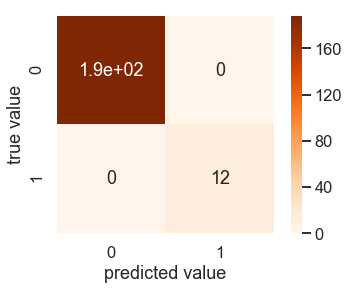

In [45]:
confusion_matrix_4 = confusion_matrix(y_test, pred)
print(confusion_matrix_4)

sns.heatmap(confusion_matrix_4, square=True, annot=True, cmap='Oranges')
plt.xlabel('predicted value')
plt.ylabel('true value')

# Classification Report (LSTM Model)

In [46]:
label = ['non-toxic', 'toxic']
report = classification_report(y_test, pred, target_names=label)
print(report)


              precision    recall  f1-score   support

   non-toxic       1.00      1.00      1.00       188
       toxic       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# simple RNN model

In [33]:
train = df.iloc[0:1000,:]
print(train.shape)

Vectorize = TfidfVectorizer()
train_X = Vectorize.fit_transform(train["comment_text"])

train_y = np.where(train['target'] >= 0.5, 1, 0)
print(train_X.shape) 
print(train_y.shape)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(1000, 45)
(1000, 7341)
(1000,)


((800, 7341), (200, 7341), (800,), (200,))

In [30]:
model_2 = Sequential()
model_2.add(Embedding(X_train.shape[1], 128))
model_2.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_2.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=5, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 41s 51ms/step - loss: nan - acc: 0.1363 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/5
800/800 [==============================] - 31s 39ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/5
800/800 [==============================] - 31s 39ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/5
800/800 [==============================] - 31s 39ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/5
800/800 [==============================] - 31s 39ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00


# GRU model

In [34]:
model_3 = Sequential()
model_3.add(Embedding(X_train.shape[1], 128))
model_3.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_3.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=5, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 223s 279ms/step - loss: 0.6663 - acc: 0.7875 - val_loss: 0.5793 - val_acc: 0.9400
Epoch 2/5
800/800 [==============================] - 210s 262ms/step - loss: 0.5444 - acc: 0.9400 - val_loss: 0.4385 - val_acc: 0.9400
Epoch 3/5
800/800 [==============================] - 211s 263ms/step - loss: 0.3939 - acc: 0.9400 - val_loss: 0.2713 - val_acc: 0.9400
Epoch 4/5
800/800 [==============================] - 251s 314ms/step - loss: 0.2588 - acc: 0.9400 - val_loss: 0.2460 - val_acc: 0.9400
Epoch 5/5
800/800 [==============================] - 262s 328ms/step - loss: 0.2482 - acc: 0.9400 - val_loss: 0.2340 - val_acc: 0.9400


In [35]:
score_3, acc_3 = model_3.evaluate(X_test, y_test, batch_size=32)
print('Test accuracy:', acc_3)

200/200 [==============================] - 9s 43ms/step
Test accuracy: 0.94


# GRU Model Summary

In [36]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         939648    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,038,465
Trainable params: 1,038,465
Non-trainable params: 0
_________________________________________________________________


# Training vs validation accuracy and loss (GRU model)

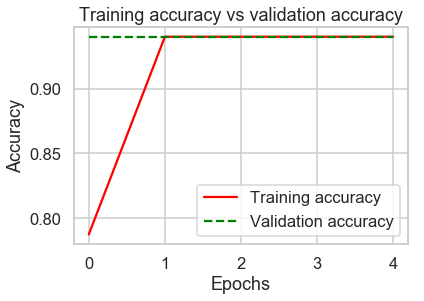

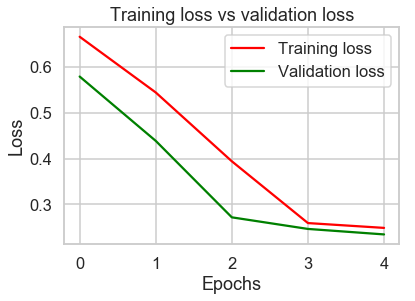

In [48]:
sns.set_style("whitegrid")
custom_palette = ["red","green"]
sns.set_palette(custom_palette)
sns.set_context('talk')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'], linestyle='--')
plt.title('Training accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss vs validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [58]:
pred_3 = model_3.predict(y_test)
# print(pred_3)
pred_3 = np.where(pred_3 >= 0.47, 1, 0)
# print(pred_3)

# Confusion Matrix (GRU model)

[[188   0]
 [  0  12]]


Text(72.90000000000006, 0.5, 'true value')

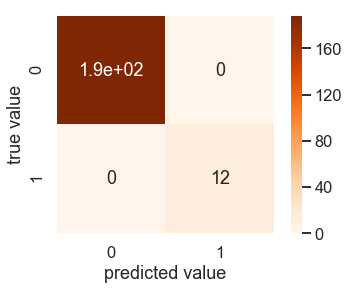

In [42]:
confusion_matrix_6 = confusion_matrix(y_test, pred_3)
print(confusion_matrix_6)

sns.heatmap(confusion_matrix_6, square=True, annot=True, cmap='Oranges')
plt.xlabel('predicted value')
plt.ylabel('true value')

# Classification Report (GRU model)

In [60]:
label = ['non-toxic', 'toxic']
report = classification_report(y_test, pred_3, target_names=label)
print(report)

              precision    recall  f1-score   support

   non-toxic       1.00      1.00      1.00       188
       toxic       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

